<a href="https://colab.research.google.com/github/ziyadshezoo/-Advertising-Sales-Linear-Regression-/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADVERTISING SALES PREDICION

model made by "GURKIRAT KAUR"

# 1. Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the dataset and analyzing it

In [5]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 3. Data preprocessing

* checking Null values


In [9]:
df.isnull().sum() # there is no null values in the data

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* checking Duplicates

In [10]:
df.duplicated().sum() # there is no duplicated values in the data

0

* correlation

In [11]:
corr= df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [12]:
df["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

## 4. Data Visualisation

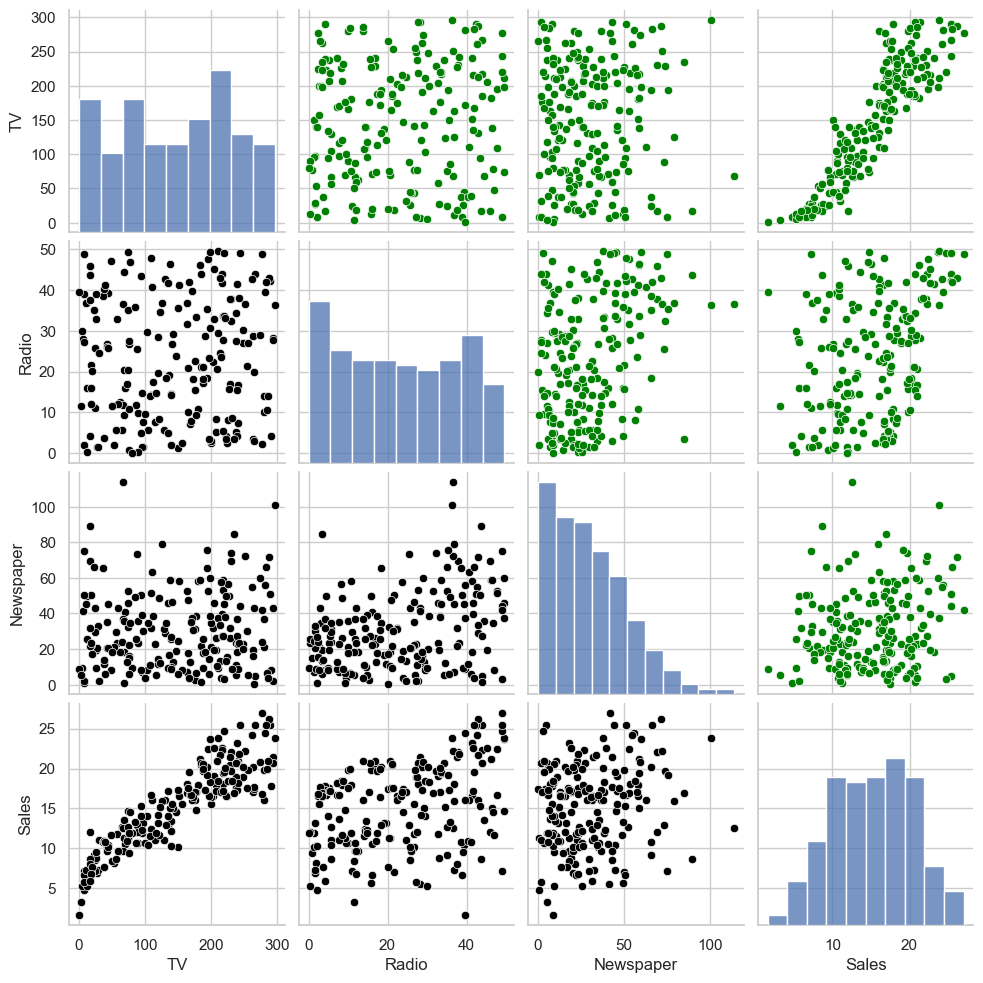

In [13]:
sn=sns.pairplot(df)
sn.map_upper(sns.scatterplot,color="green")
sn.map_lower(sns.scatterplot,color="black")


Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

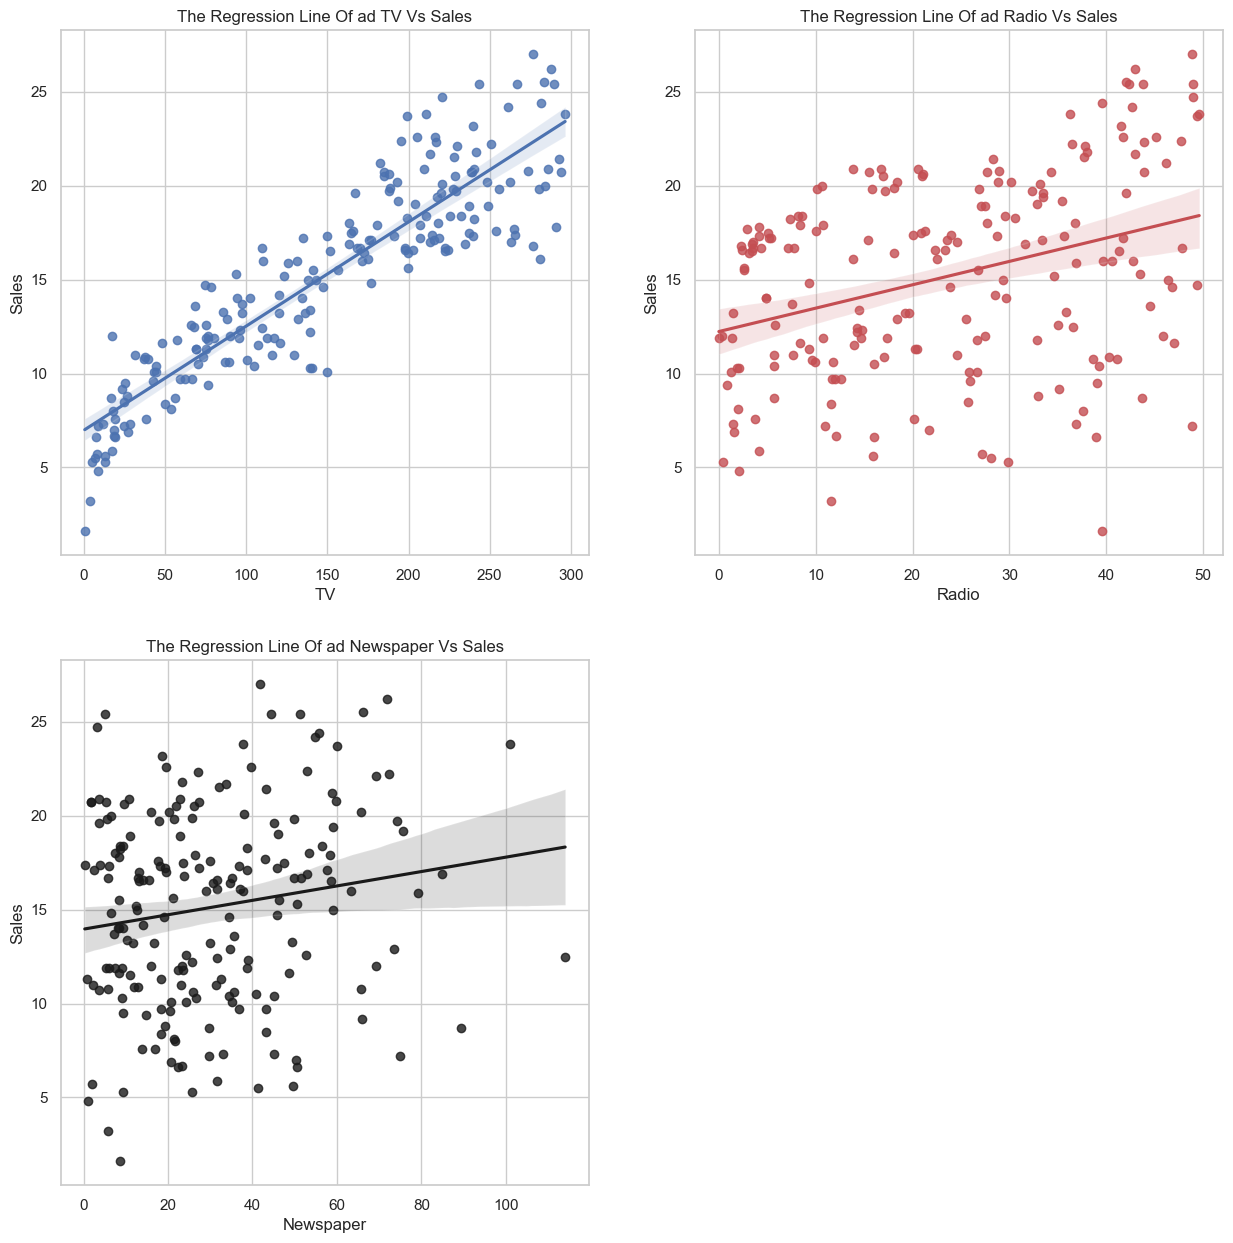

In [14]:
plt.figure(figsize =(15,15))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='k').set_title('The Regression Line Of ad Newspaper Vs Sales')

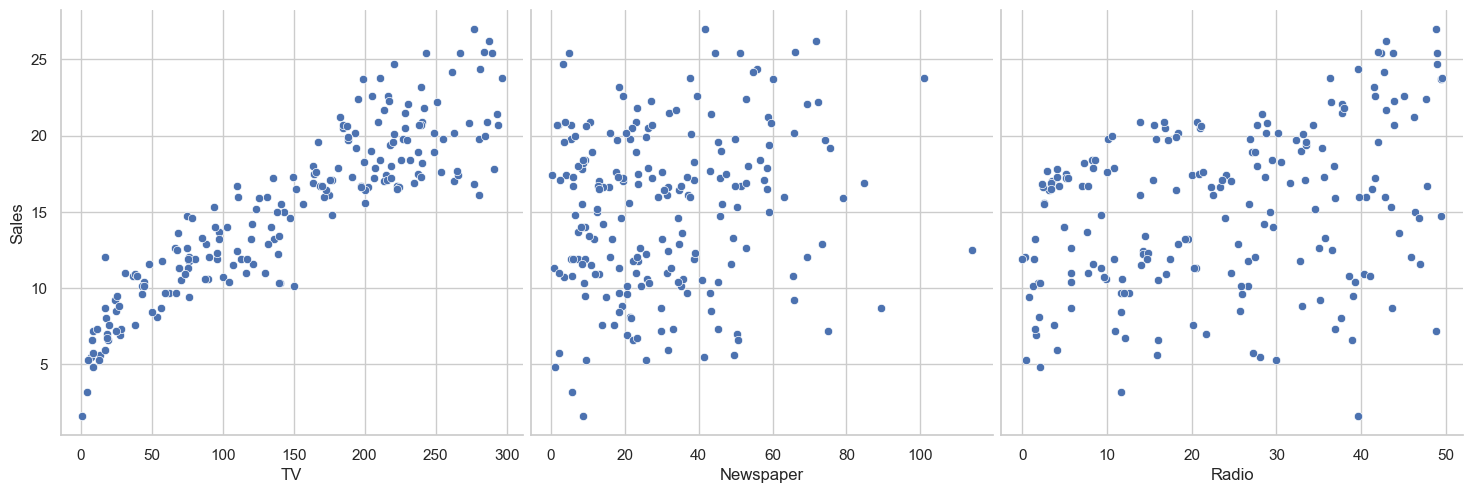

In [15]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=5,aspect=1)
plt.show()

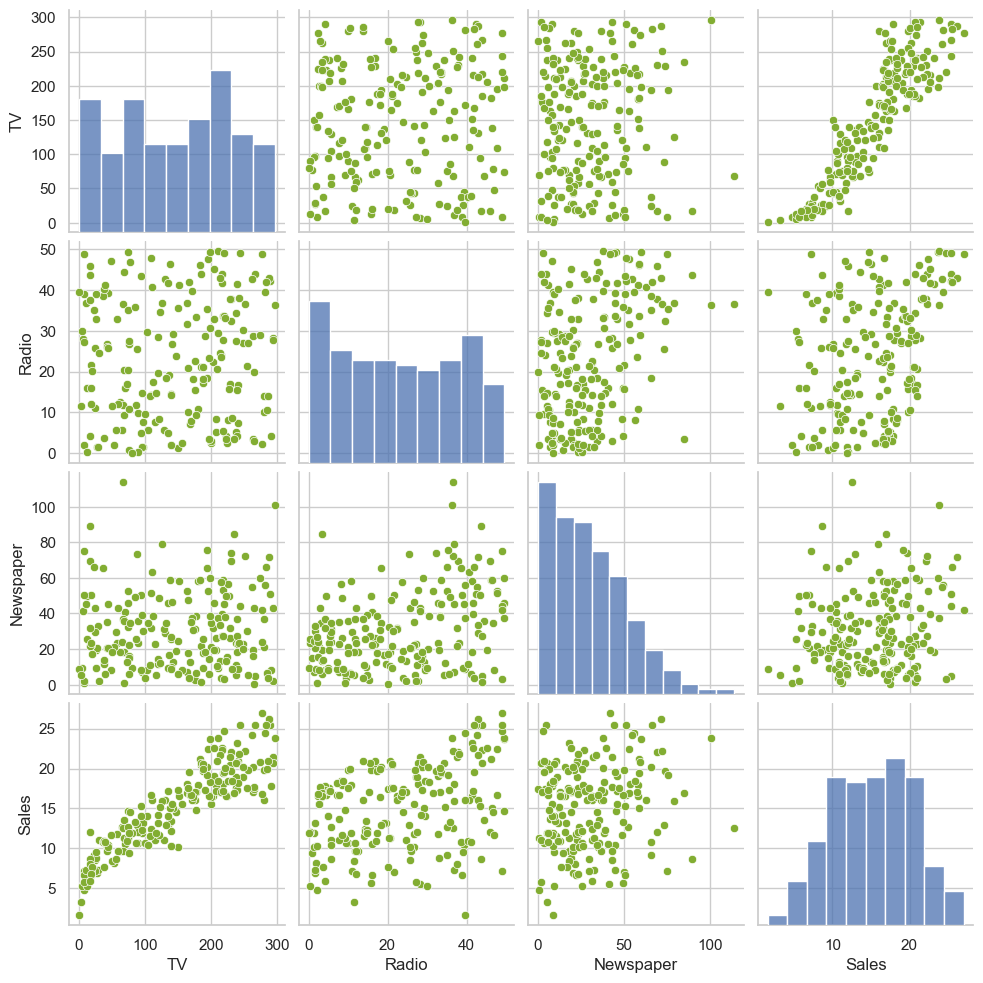

In [16]:
sns.pairplot(df,plot_kws={'color':"#82ad32"})

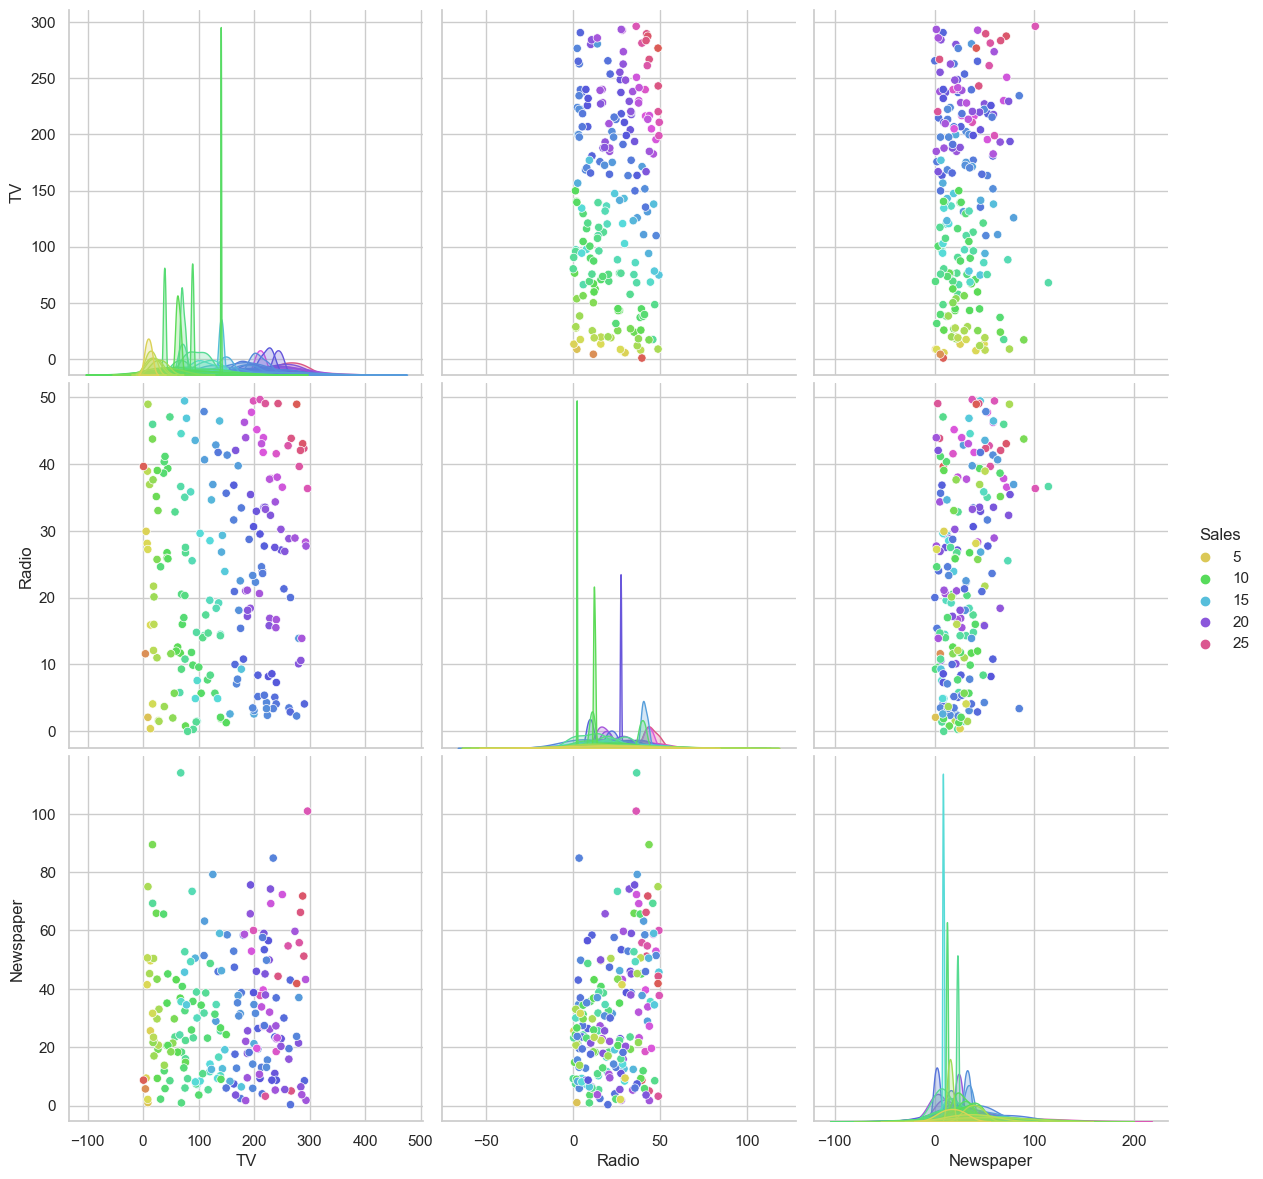

In [17]:
sns.pairplot(df,kind='scatter',aspect=1,height=4,palette='hls',hue='Sales')

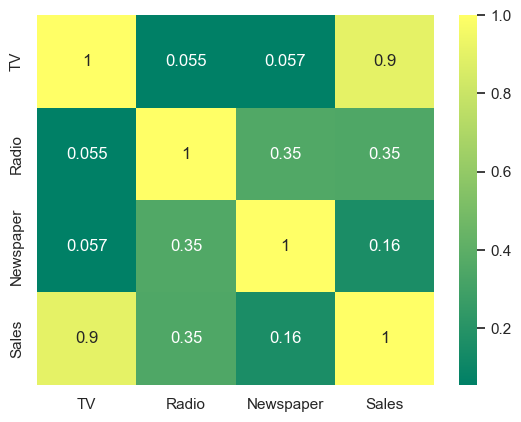

In [18]:
#visualize correlation of our target variable with other features
sns.heatmap(df.corr(),annot= True,cmap='summer')
plt.show()

wih the above visualisation we can see that the expenditure on the advertisement of TV has the most positive effect on Sales

## 5. Building a model

In [19]:
#splitting data into features and target variables
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [20]:
#splitting data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
# model selection 
model= LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

let's see how our model looks like

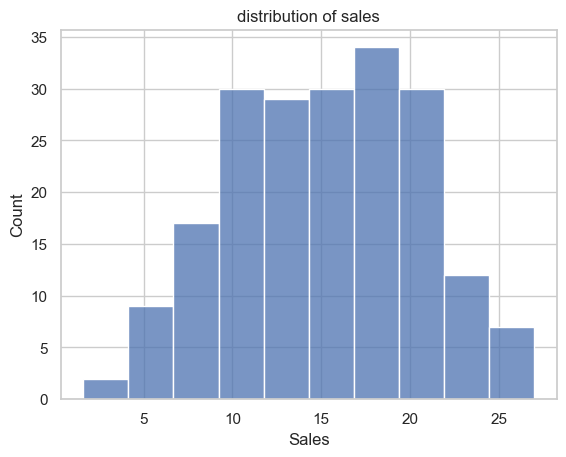

In [22]:
sns.histplot(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('distribution of sales')
plt.show()

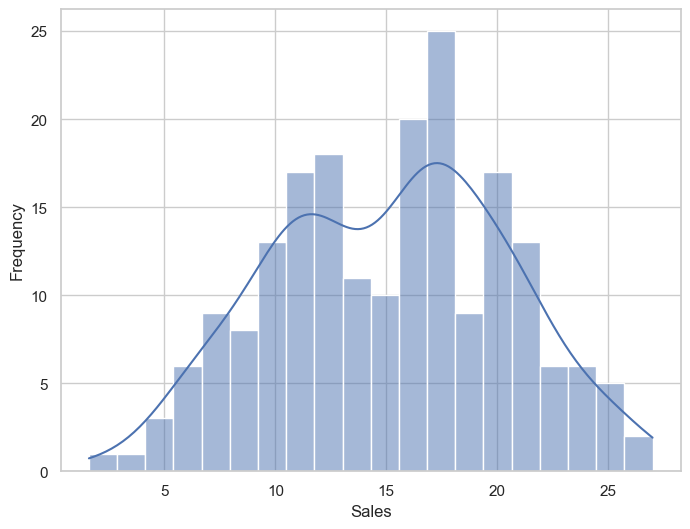

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'],bins=20,kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

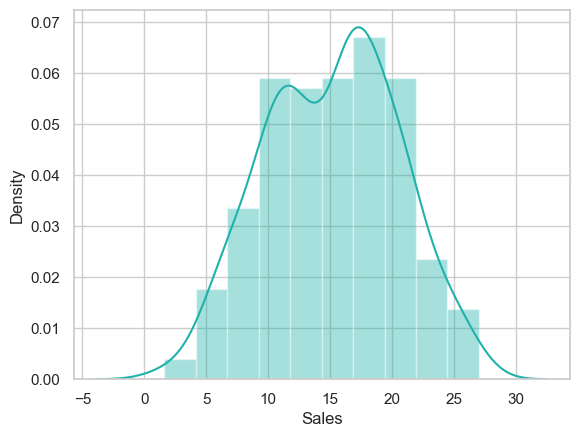

In [25]:
sns.distplot(df['Sales'],color="lightseagreen");


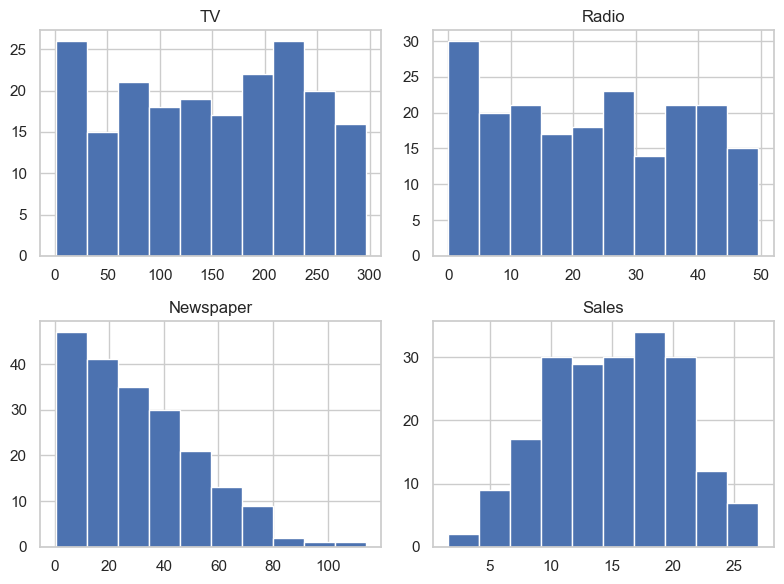

In [27]:
df.hist(bins=10,figsize=(8,6))
plt.tight_layout()
plt.show()

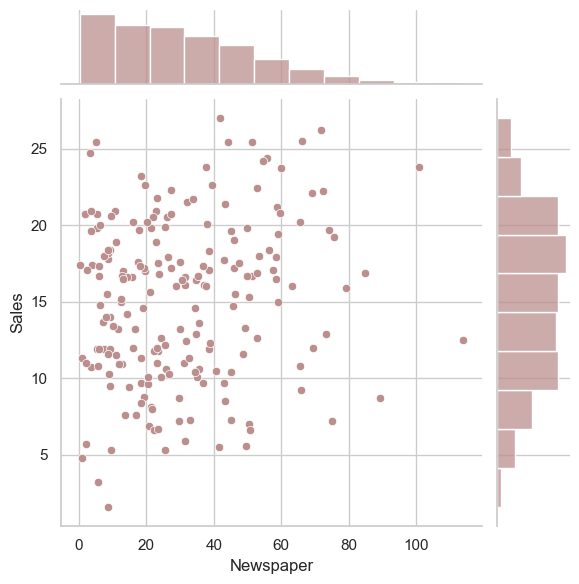

In [26]:
sns.jointplot(x="Newspaper",y="Sales",data=df,color= "rosybrown")

<Axes: >

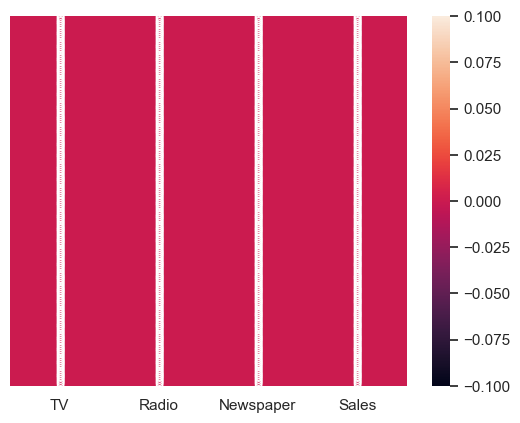

In [28]:
# to check outliers
sns.heatmap(df.isnull(),yticklabels=False,annot =True)

<Axes: xlabel='Newspaper', ylabel='Sales'>

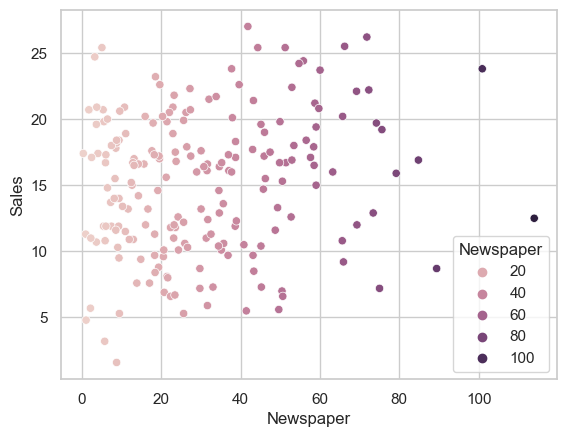

In [29]:
sns.scatterplot(x='Newspaper',y='Sales',hue='Newspaper', data =df)

<Axes: xlabel='Sales', ylabel='TV'>

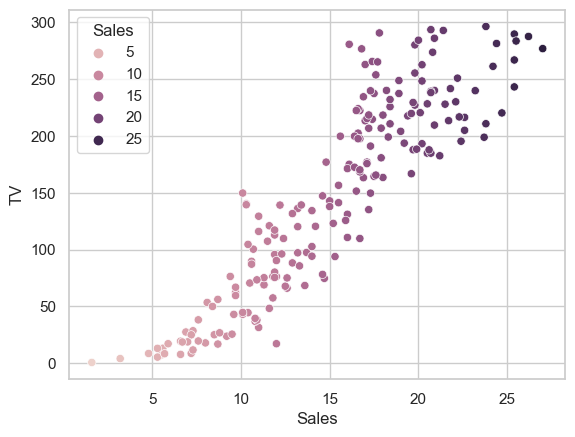

In [31]:
sns.scatterplot(x='Sales',y='TV',hue='Sales', data =df)

<Axes: xlabel='TV', ylabel='Newspaper'>

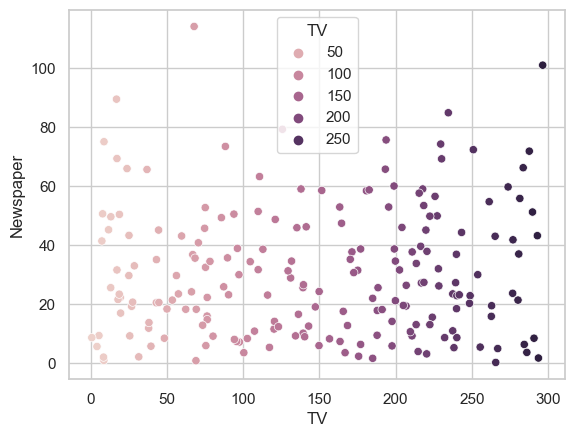

In [32]:
sns.scatterplot(x='TV',y='Newspaper',hue='TV', data =df)

## 6. Evaluating the model

in order to predict the sales we implement simple linear regression to build a model(using TV as feature variable)

In [35]:
y_preds= model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)

In [37]:
mse

2.9077569102710923

In [38]:
print("mean squared error:",mse)

mean squared error: 2.9077569102710923


In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_preds)

In [40]:
mae

1.2748262109549344

In [42]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_preds)
r2

0.9059011844150826

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, p))

Mean Absolute Error: 1.3662313868452756


In [37]:
print(f'Accuracy : {reg.score(testx,testy)*100} %')

Accuracy : 86.92052734910129 %


## 7. summary

this is how using Data Analysis and machine learning algorithms , we have successfully able to predict sales